## Problem Statement

Given a dataset containing information about homes.
Each row represents a house, and each column represents a feature describing that house.

### Objective
The goal of this project is to build a regression model that can accurately predict
the **SalePrice** of a house based on its features.

This is a **supervised machine learning regression problem** because:
- The target variable (SalePrice) is known
- The output is a continuous numerical value

### Step1: Import Required Libraries

Import libraries for:
- Data handling (NumPy, Pandas)
- Visualization (Matplotlib, Seaborn)
- Machine Learning models and evaluation (Scikit-learn)

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor


### Step 2: Load the Dataset (Train and Test)

Load the training dataset provided by Kaggle.
This dataset includes both the input features and the target variable (SalePrice).


In [49]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 3: Initial Data Inspection

Before any analysis, inspect:
- Shape of the dataset
- Data types
- Missing values
- Basic statistics

This helps to understand the structure and quality of the data.

In [50]:
df_train.shape

(1460, 81)

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
pd.set_option('display.max_rows', None)
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [53]:
df_train.describe(include = "all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


**Interpretation**

- Dataset has 1460 rows and 81 columns
- Mix of numerical and categorical features
- Several columns contain missing values
- Target variable is SalePrice

### Step 4: Exploratory Data Analysis (EDA)

**Step 4.1**: Distribution of Target Variable (SalePrice)

Visualize the distribution of SalePrice to:
- Check skewness
- Identify outliers
- Decide whether transformation is needed

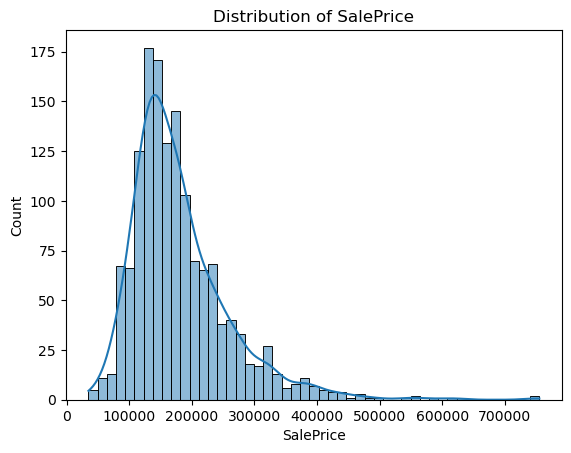

In [54]:
sns.histplot(df_train["SalePrice"], kde = True)
plt.title("Distribution of SalePrice")
plt.show()

**Interpretation**

- SalePrice is right-skewed
- Most houses fall in a lower price range

**Step 4.2**: Relationship Between Living Area and Sale Price

Expected: larger houses to have higher prices.
Visualize this using a scatter plot.


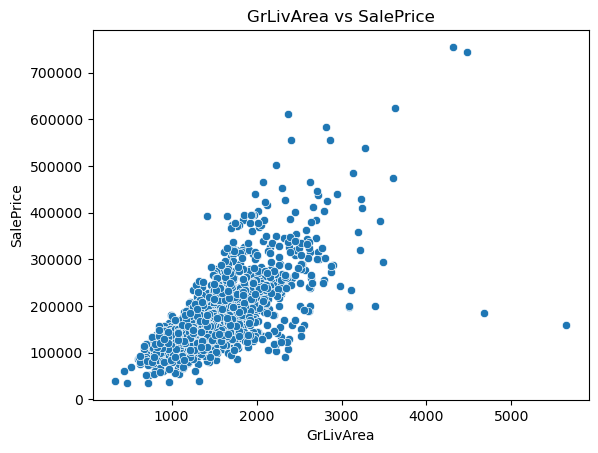

In [55]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)
plt.title("GrLivArea vs SalePrice")
plt.show()

**Interpretation**

- Strong positive relationship
- Some extreme outliers visible

**Step 4.3**: Correlation Matrix

Correlation helps identify features that strongly influence SalePrice.
Focus only on numerical features.

In [56]:
corr = df_train.corr(numeric_only=True)

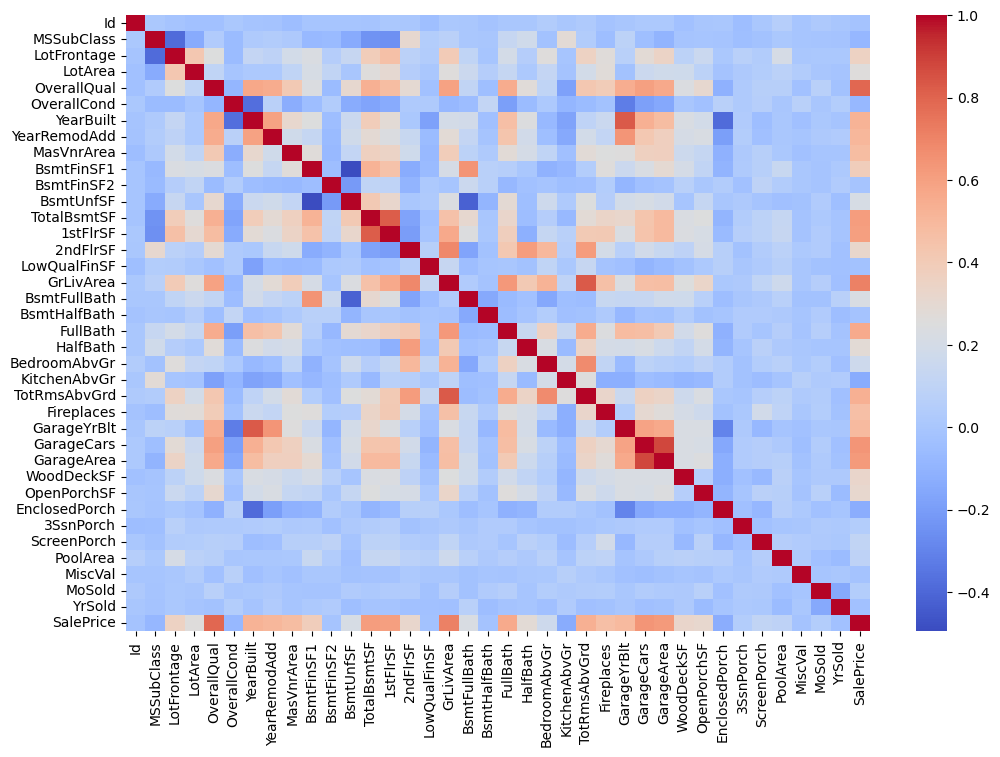

In [57]:
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

Check SalePrice correlation with other features

In [58]:
corr['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

**Interpretation**:
Strong predictors:
- OverallQual
- GrLivArea
- GarageCars
- TotalBsmtSF
- YearBuilt

### Step 5: Handling Missing Values
Machine learning models cannot handle missing values directly.
Analyze missing data and apply appropriate imputation strategies.

In [59]:
df_train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

Segregate numerical and categorical columns

In [60]:
num_cols = df_train.select_dtypes(include = np.number).columns
cat_cols = df_train.select_dtypes(exclude = np.number).columns

In [61]:
df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())
df_train[cat_cols] = df_train[cat_cols].fillna("None")

In [62]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### Step 6: Outlier Treatment
Extreme outliers can heavily affect regression models.
Based on EDA, remove unusually large houses.

In [63]:
df_train = df_train[df_train['GrLivArea'] < 4000]

In [64]:
df_train.shape

(1456, 81)

### Step 7: Feature Engineering

Create new features that better represent real-world concepts.
Example: Total usable area of a house.


In [65]:
df_train.loc[:, 'TotalArea'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']

In [66]:
df_train.shape

(1456, 82)

### Step 8: Log Transformation of SalePrice

Log transformation:
- Reduces skewness
- Improves linear model performance

In [67]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

### Step 9: Encoding Categorical Variables
**One-Hot Encoding**

Machine learning models require numerical input.
Convert categorical variables into dummy variables.

In [68]:
df_train = pd.get_dummies(df_train, drop_first=True)

### Step 10: Train-Test Split

Split the dataset into:
- Training set (80%)
- Test set (20%)

This allows to evaluate model performance on unseen data.

In [69]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Step 11: Feature Scaling

Scaling is required for:
- Linear Regression
- Ridge and Lasso

It ensures all features contribute equally.

In [71]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Step 12: Model Training & Evaluation

**Step 12.1: Linear Regression**

This model assumes a linear relationship between features and target.


In [72]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

rmse_lr, mae_lr

(np.float64(0.1325244421494556), 0.09216971090771915)

**Step 12.2: Regularization Models**
Both Ridge and Lasso differs in their penalties

**Ridge**: Reduces overfitting by shrinking coefficients (add squared coefficents - suits well when all features matter)

**Lasso**: Performs feature selection by forcing some coefficients to zero (add absolute coefficients - suits well when some features are irrelevant)


In [73]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.001)

**Step 12.3: Decision Tree Regressor**

Decision Trees:
- Capture non-linear relationships
- Do not require feature scaling


In [74]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_dt

np.float64(0.20160040170556506)

**Step 12.4: Ordinary Least Squares (OLS) Regression**

OLS regression is used to understand the statistical relationship
between features and the target variable. It helps identify
which features significantly affect house prices.


In [75]:
import statsmodels.api as sm

X_ols = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_ols).fit()

### Step 13: Model Evaluation

After training multiple regression models, Evaluate and compare their
performance on the test dataset.

Error-based metrics that measure how far the predicted house prices are from the actual values.

The models compared are:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regressor
- Ordinary Least Squares (OLS) Regression



**Evaluation Metrics**

Use the following metrics to evaluate model performance:

1. RMSE (Root Mean Squared Error)
   - Penalizes large errors more heavily
   - Most commonly used metric in house price prediction

2. MAE (Mean Absolute Error)
   - Measures average magnitude of errors
   - Less sensitive to outliers than RMSE

Using multiple metrics gives a more complete understanding of model performance.


In [76]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

In [77]:
# Linear Regression
rmse_lr, mae_lr = evaluate_model(y_test, y_pred_lr)

# Ridge
y_pred_ridge = ridge.predict(X_test_scaled)
rmse_ridge, mae_ridge = evaluate_model(y_test, y_pred_ridge)

# Lasso
y_pred_lasso = lasso.predict(X_test_scaled)
rmse_lasso, mae_lasso = evaluate_model(y_test, y_pred_lasso)

# Decision Tree
rmse_dt, mae_dt = evaluate_model(y_test, y_pred_dt)

# OLS
X_test_ols = sm.add_constant(X_test_scaled)
y_pred_ols = ols_model.predict(X_test_ols)
rmse_ols, mae_ols = evaluate_model(y_test, y_pred_ols)

### Model Comparison Table

In [78]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Decision Tree",
        "OLS Regression"
    ],
    "RMSE": [
        rmse_lr,
        rmse_ridge,
        rmse_lasso,
        rmse_dt,
        rmse_ols
    ],
    "MAE": [
        mae_lr,
        mae_ridge,
        mae_lasso,
        mae_dt,
        mae_ols
    ]
})

results.sort_values(by="RMSE")


,Model,RMSE,MAE
2,Lasso Regression,0.128224,0.087428
1,Ridge Regression,0.131886,0.091702
4,OLS Regression,0.132524,0.092170
0,Linear Regression,0.132524,0.092170
3,Decision Tree,0.201600,0.146797


### Interpretation of Model Performance

Based on the evaluation results, **Lasso Regression** achieved the lowest RMSE
and MAE among all the tested models, indicating the best predictive
performance on the train data.

**Ridge Regression**, **OLS Regression**, and **standard Linear Regression** showed
very similar performance, suggesting that the underlying relationship
between features and house prices is largely linear.

**OLS and Linear Regression** produced identical results because both solve
the same Ordinary Least Squares optimization problem, with OLS providing
additional statistical insights rather than improved prediction accuracy.

**Decision Tree Regressor** performed significantly worse than linear models,
likely due to overfitting and its sensitivity to data splits in the absence
of extensive hyperparameter tuning.

- **Lasso Regression** performed best because L1 regularization helps reduce
  noise by shrinking less important feature coefficients to zero, which
  improves generalization in high-dimensional data.

- **Ridge Regression** improved slightly over plain linear models by stabilizing
  coefficients but did not outperform Lasso.

- **OLS and Linear Regression** are equivalent in predictive power; OLS is mainly
  valuable for statistical interpretation (p-values, confidence intervals).

- **Decision Tree** struggled due to lack of regularization and sensitivity to
  outliers and variance in the data.



### Step 14: Final Conclusion

This project implemented an end-to-end regression workflow to predict
house prices using test dataset.

### Summary of Findings

1. Exploratory Data Analysis showed that house prices are strongly influenced
   by quality-related features, living area, and overall size of the house.

2. Careful handling of missing values and appropriate feature engineering
   improved data quality and model performance.

3. Linear regression-based models performed better than tree-based models,
   indicating that the relationship between predictors and house prices is
   predominantly linear.

4. Among all models, **Lasso Regression achieved the best performance**, with
   the lowest RMSE and MAE. This highlights the importance of feature selection
   and regularization in high-dimensional datasets.

5. OLS Regression provided valuable statistical insights such as feature
   significance and adjusted R², making it useful for interpretation,
   even though its predictive performance was similar to standard linear
   regression.

## Final Model Selection

The final model selected for this project is **Lasso Regression**, as it
offers the best balance between predictive accuracy, model simplicity,
and generalization performance.


### Step 15: Load Test Dataset and proceed to perform the same EDA and preprocessing on test data for predictions

In [79]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [80]:
test_ids = df_test['Id']

In [81]:
# Handle Missing values
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [82]:
num_cols = df_test.select_dtypes(include=np.number).columns
cat_cols = df_test.select_dtypes(exclude=np.number).columns

df_test[num_cols] = df_test[num_cols].fillna(df_train[num_cols].median())
df_test[cat_cols] = df_test[cat_cols].fillna("None")

### **Used train data median because** :
Train data = past (known data)

Test data = future (unseen data)

In real life: You do not know the distribution of future data when training a model.

So: All statistics (mean, median, std, etc.), must be learned from training data and then applied to new data.

In [83]:
# Feature Engineering 
df_test['TotalArea'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']

In [84]:
# One-Hot Encode Test Data
df_test = pd.get_dummies(df_test)

In [85]:
# Align Test Columns with Train Columns
df_test = df_test.reindex(columns=X.columns, fill_value=0)

In [86]:
# Scale Test Features
test_scaled = scaler.transform(df_test)

### Step 15: Predict Using Final Lasso Model

In [87]:
test_preds_log = lasso.predict(test_scaled)

### Step 16: Inverse Log Transformation - 
**As model trained on log1p(SalePrice) - Convert back to original price scale**


In [88]:
test_preds = np.expm1(test_preds_log)

### Step 17: Create Submission DataFrame

In [89]:
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_preds
})

submission.head()
submission.to_csv("lasso_house_price_submission.csv", index=False)

**After selecting Lasso Regression as the final model, the trained model was applied to the unseen test dataset by using the same preprocessing pipeline, and the final predictions were exported as a submission-ready CSV file.**